In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import importlib
import os

In [5]:
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools")
import database_tools as dbt
importlib.reload(dbt)

<module 'database_tools' from '/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools/database_tools.py'>

In [6]:
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves")
from calculate_phase.atlas_SQL_query_df import get_orb_elements_id,atlas_SQL_query_orbid,atlas_SQL_query_orbid_expname
from calculate_phase import atlas_database_connection

In [22]:
# select all available limiting_magnitude data
# not available for all exposures for some reason
qry = "select limiting_magnitude from atlas_exposures where limiting_magnitude is not null order by rand()"#" limit 1000000"
cnx=atlas_database_connection.database_connection().connect()

In [23]:
df_data=pd.read_sql_query(qry,cnx)
df_data.to_csv("df_data_lim_mag.csv")

In [24]:
df_data = pd.read_csv("df_data_lim_mag.csv",index_col=0)

In [25]:
df_data

,limiting_magnitude
0,19.280000
1,18.910000
2,18.660000
3,19.050000
4,19.139999
...,...
943292,19.210000
943293,17.330000
943294,19.070000
943295,19.570000


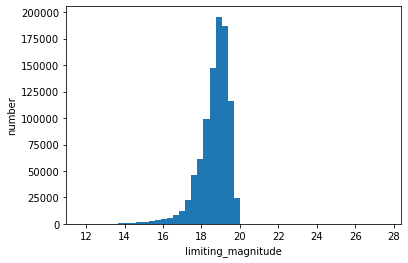

In [28]:
x_plot = "limiting_magnitude"
df_plot = df_data
bins = 50

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.hist(df_plot[x_plot], bins = bins)#, log=True)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("number")

plt.show()

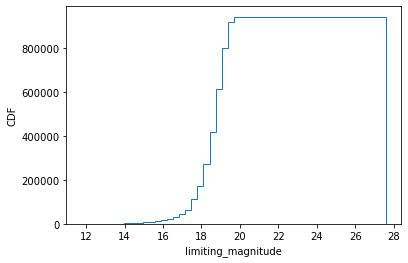

In [30]:
x_plot = "limiting_magnitude"
df_plot = df_data
bins = 50

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

x=ax1.hist(df_plot[x_plot], density=False, cumulative=True, histtype='step',bins=bins)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("CDF")

plt.show()

In [33]:
print(len(df_data))
print(len(df_data[df_data["limiting_magnitude"]<18]))

943297
148121
